In [ ]:
!pip install --upgrade tensorflow numpy


  Using cached numpy-2.0.1-cp312-cp312-win_amd64.whl.metadata (60 kB)


# Nouvelle section

In [ ]:
!pip install keras

<h1>Charger les données</h1>

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
data_df = pd.read_csv('/content/ai4i2020.csv')
data_df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
print("Résumé du dataset :")
data_df.info()


Résumé du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: 

In [ ]:
data_df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
data_df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [ ]:
data_df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [ ]:
# Comptage des occurrences de chaque Product ID
data_df['Product ID'].value_counts()

Product ID
M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
M18193    1
M18194    1
L50515    1
L50516    1
M24859    1
Name: count, Length: 10000, dtype: int64

<h1>Prétraitement Des Données</h1>

In [ ]:
# Visualisation de la distribution des données
sns.pairplot(data_df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

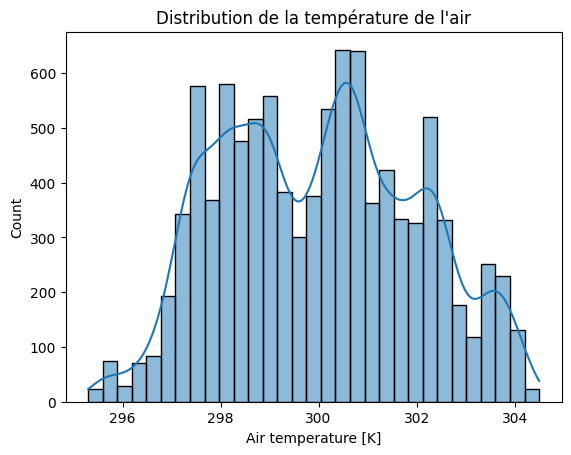

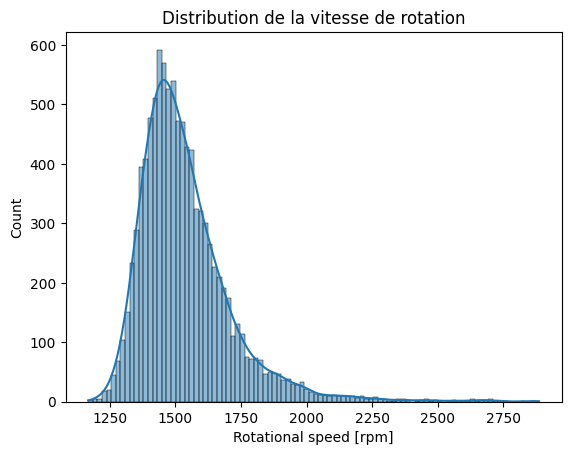

In [ ]:
# Distribution de la température de l'air
sns.histplot(data_df['Air temperature [K]'], kde=True)
plt.title('Distribution de la température de l\'air')
plt.show()

# Distribution de la vitesse de rotation
sns.histplot(data_df['Rotational speed [rpm]'], kde=True)
plt.title('Distribution de la vitesse de rotation')
plt.show()


In [ ]:
len(data_df['Product ID'].unique())

10000

In [ ]:
data_df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [ ]:
print("\nNombre de doublons :")
print(data_df.duplicated().sum())


Nombre de doublons :
0


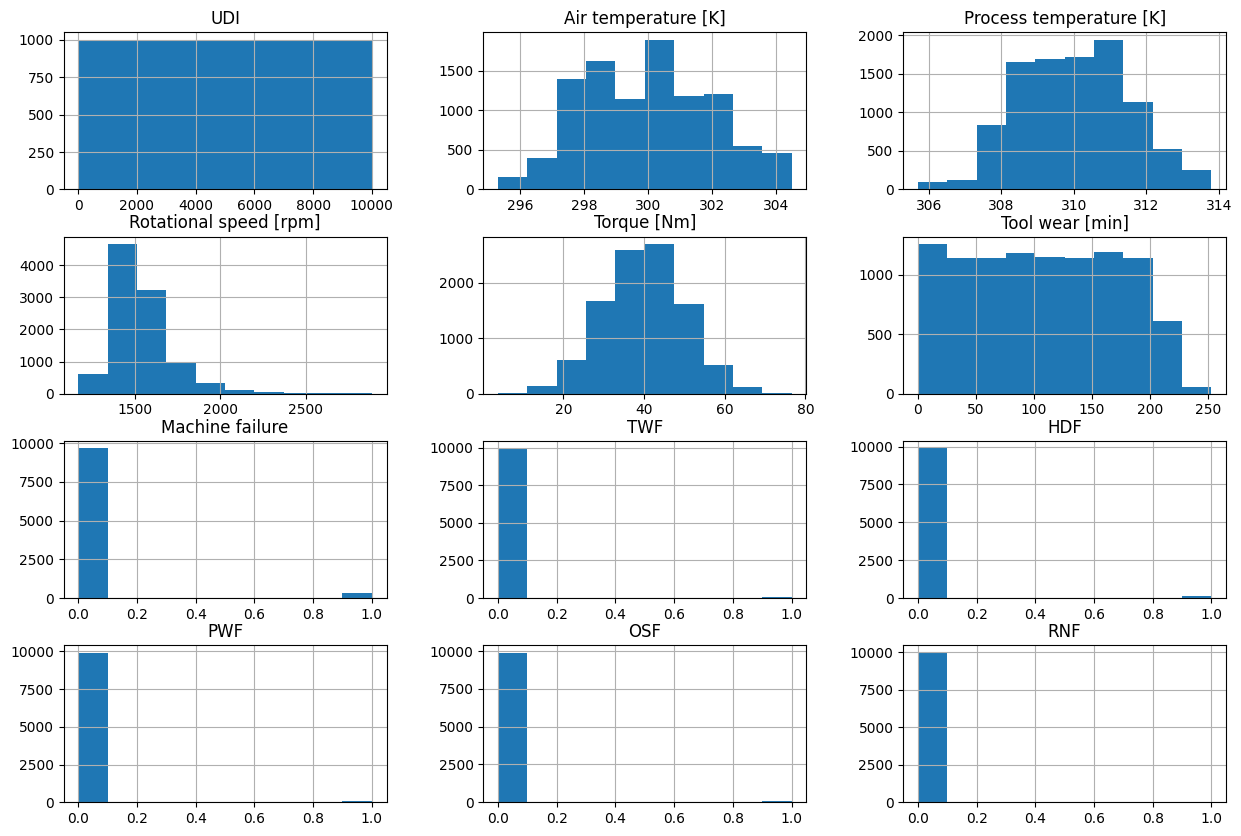

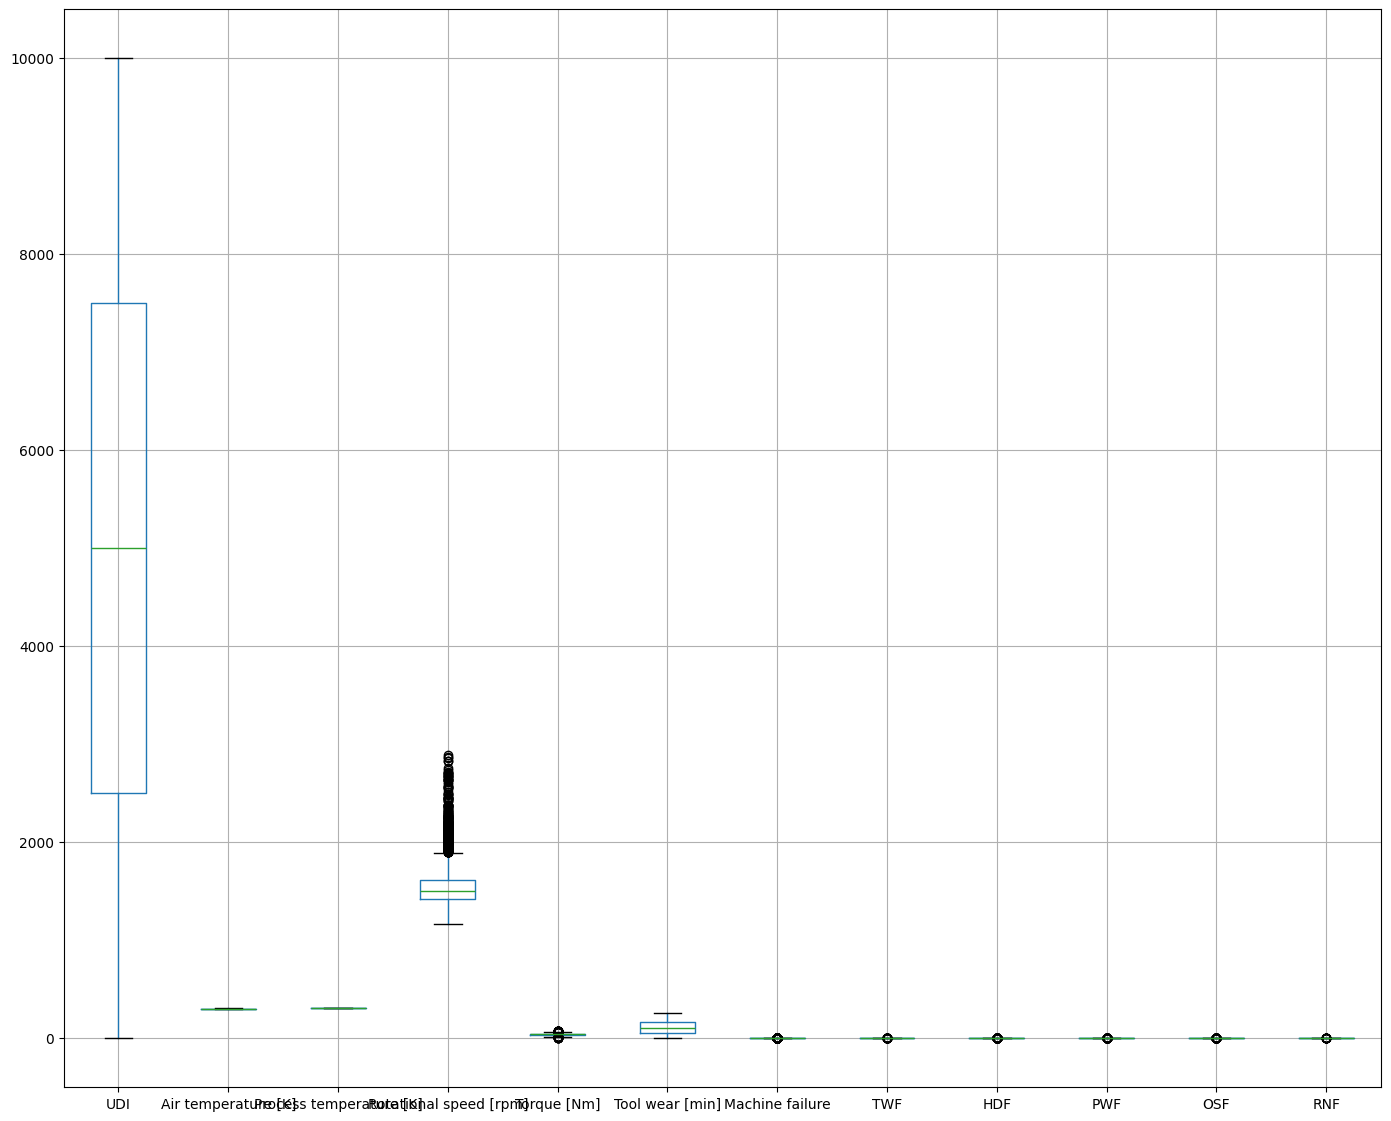

In [ ]:

# Importation des bibliothèques de visualisation de données
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution des données numériques
data_df.hist(figsize=(15, 10))
plt.show()

# Boîtes à moustaches des données numériques
data_df.boxplot(figsize=(17, 14))
plt.show()

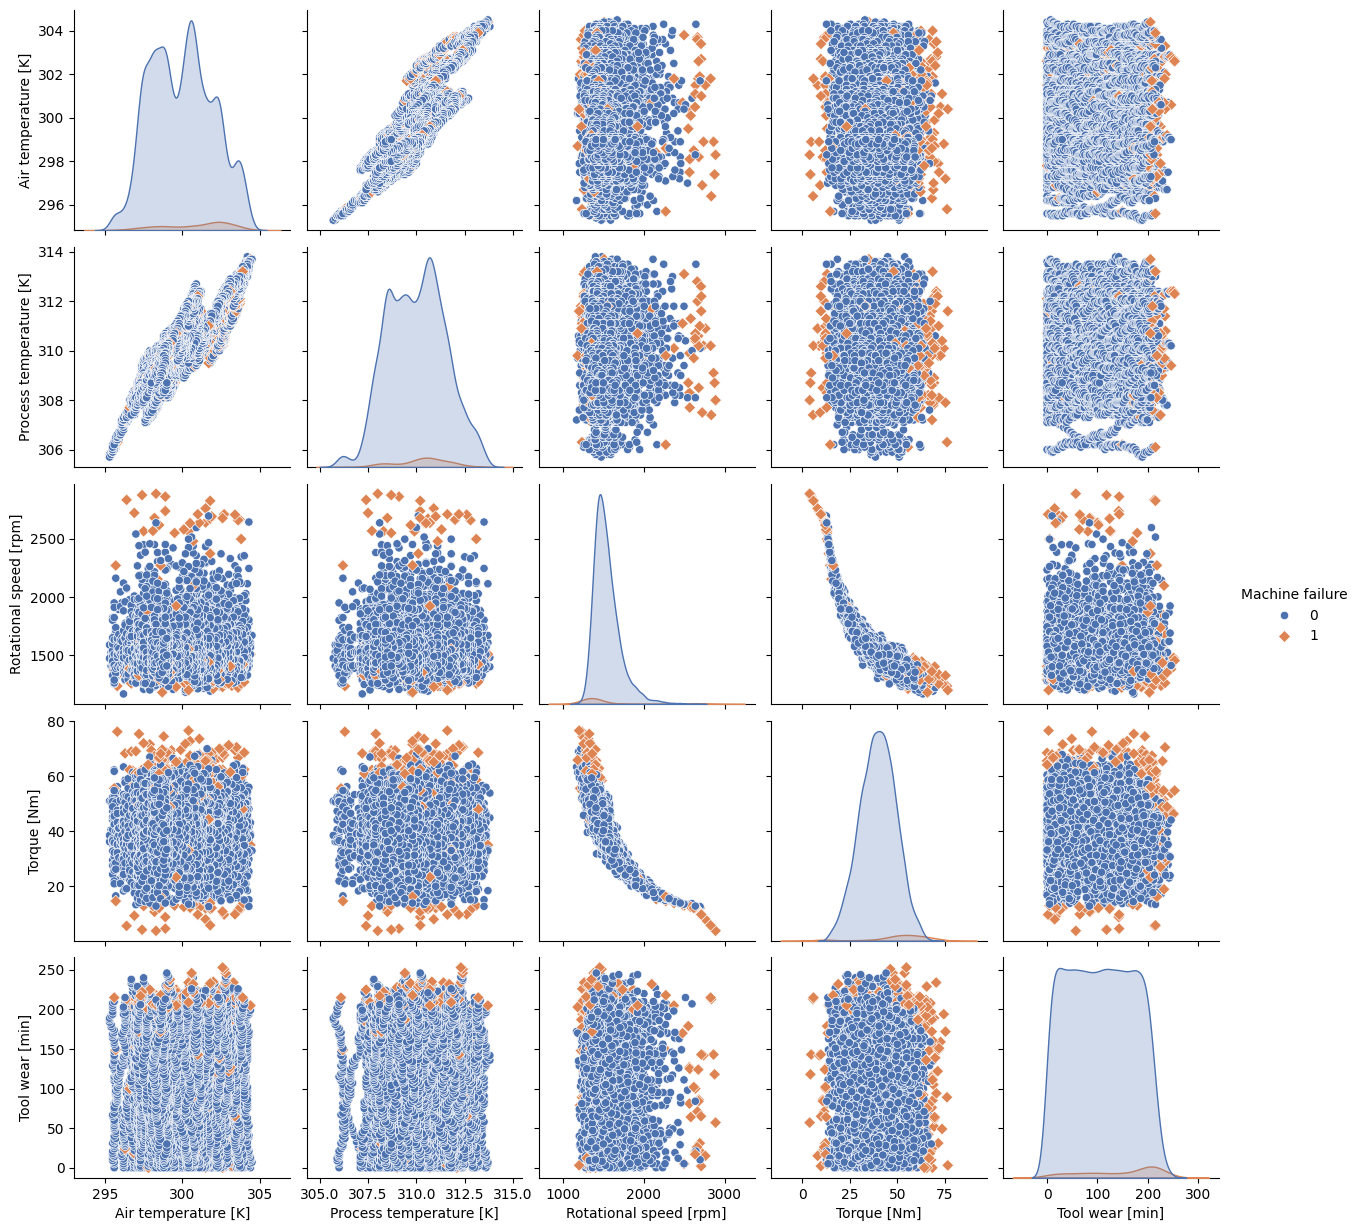

In [ ]:
data_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
sns.pairplot(data_df,
             hue='Machine failure',
              palette='deep',
             markers=['o', 'D'],
             vars=data_columns,
             diag_kind='kde');

In [ ]:
# Spécifier les colonnes numériques à convertir en float
numeric_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Set numeric columns dtype to float
data_df['Tool wear [min]'] = data_df['Tool wear [min]'].astype('float64')
data_df['Rotational speed [rpm]'] = data_df['Rotational speed [rpm]'].astype('float64')

# Vérifier les types de données pour s'assurer de la conversion
print(data_df.dtypes)

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]     float64
Torque [Nm]                float64
Tool wear [min]            float64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


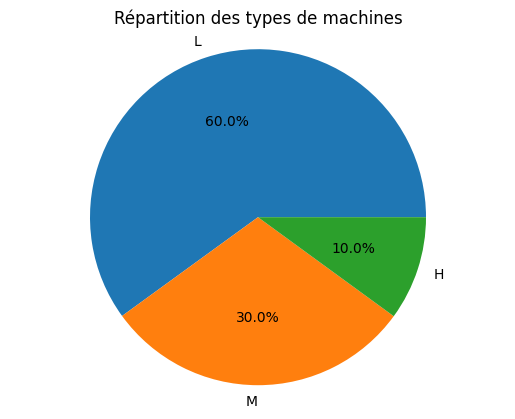

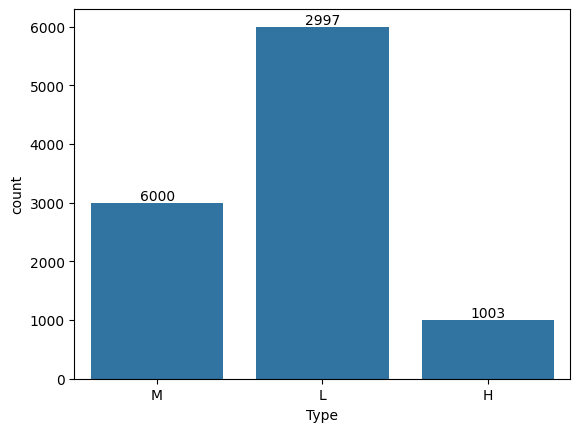

In [ ]:
type_machine = data_df['Type'].value_counts()
labels = type_machine.index
sizes = type_machine.values

#faire un diagramme circulaire
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Répartition des types de machines')
plt.axis('equal')  # Créer un diagramme circulaire
plt.show()
# Créer un diagramme à barres pour la colonne 'Type'
ax = sns.countplot(x="Type", data=data_df)

# Obtenir les valeurs de comptage de la colonne 'Type'
val_type = data_df['Type'].value_counts(ascending=False).values

# Ajouter les valeurs de comptage en tant que labels au-dessus des barres
ax.bar_label(container=ax.containers[0], labels=val_type)

# Afficher le graphique
plt.show()

In [ ]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = data_df.select_dtypes(include=['number']).columns
numeric_data = data_df[numeric_columns]
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                              UDI  Air temperature [K]  \
UDI                      1.000000             0.117428   
Air temperature [K]      0.117428             1.000000   
Process temperature [K]  0.324428             0.876107   
Rotational speed [rpm]  -0.006615             0.022670   
Torque [Nm]              0.003207            -0.013778   
Tool wear [min]         -0.010702             0.013853   
Machine failure         -0.022892             0.082556   
TWF                      0.009154             0.009955   
HDF                     -0.022215             0.137831   
PWF                     -0.023557             0.003470   
OSF                     -0.000990             0.001988   
RNF                     -0.005954             0.017688   

                         Process temperature [K]  Rotational speed [rpm]  \
UDI                                     0.324428               -0.006615   
Air temperature [K]                     0.876107                0.022670   
Process temperatu

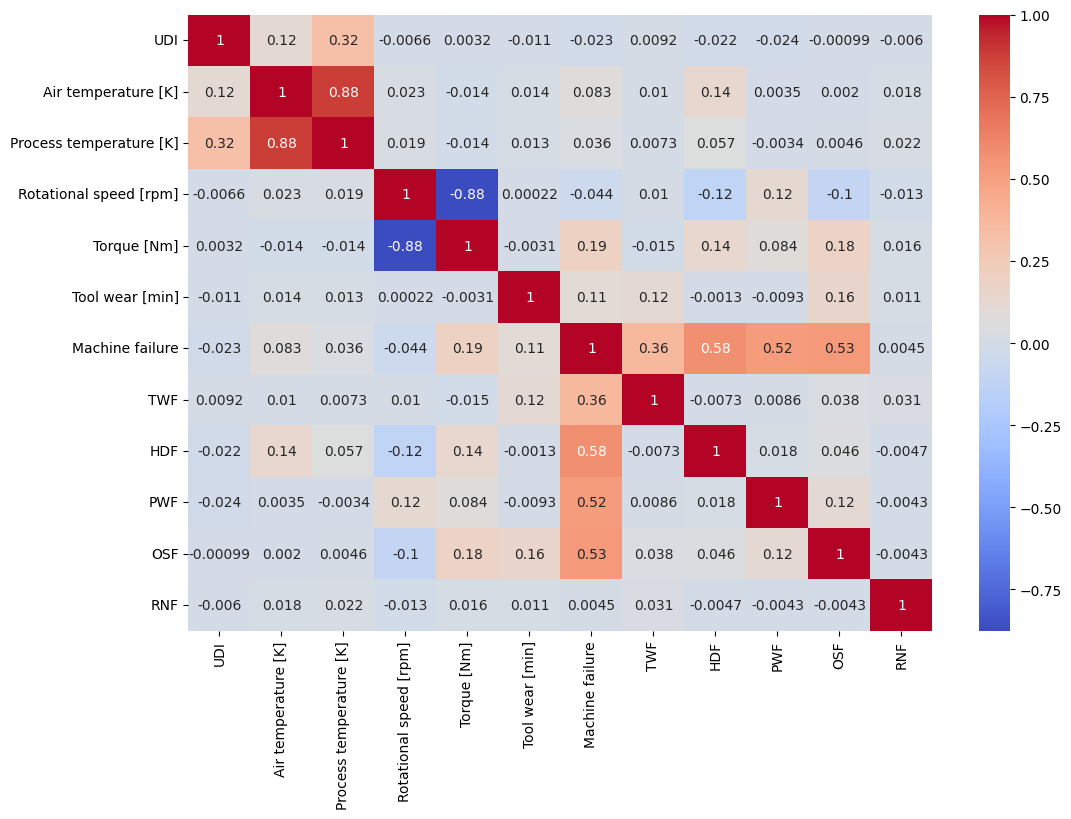

In [ ]:

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [2]:
data_df['Product ID']= data_df['Product ID'].astype('object')
data_df['Product ID']= data_df['Product ID'].fillna('Unknown')


In [ ]:
# Supposons que les noms des colonnes sont corrects, si ce n'est pas le cas, ajustez les noms en conséquence
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Compter le nombre de défaillances de chaque type
failure_counts = data_df[failure_types].sum().reset_index()
failure_counts.columns = ['Failure Type', 'Count']



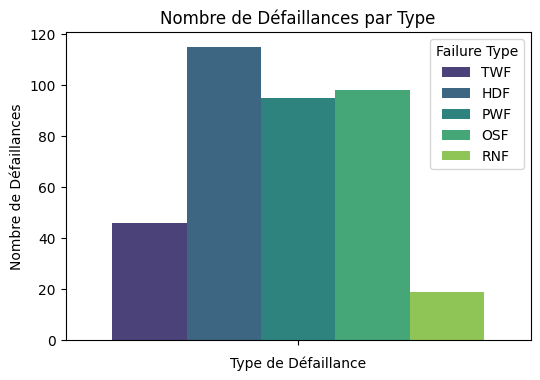

In [ ]:
# Afficher les défaillances de chaque type
f1=plt.figure(figsize=(6, 4))
sns.barplot(hue='Failure Type', y='Count', data=failure_counts, palette='viridis')
plt.title('Nombre de Défaillances par Type')
plt.xlabel('Type de Défaillance')
plt.ylabel('Nombre de Défaillances')
plt.show()

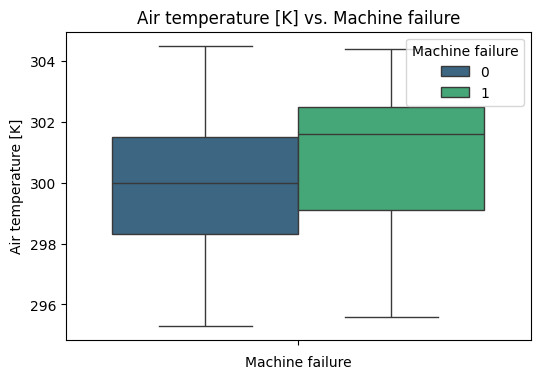

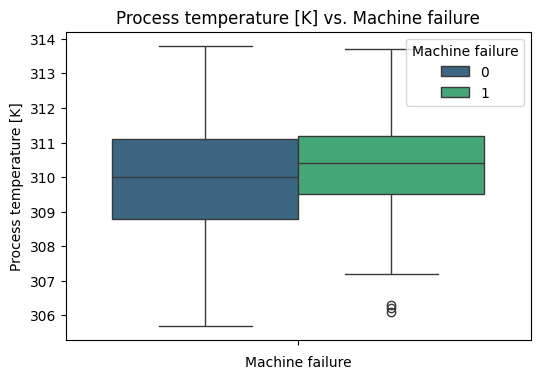

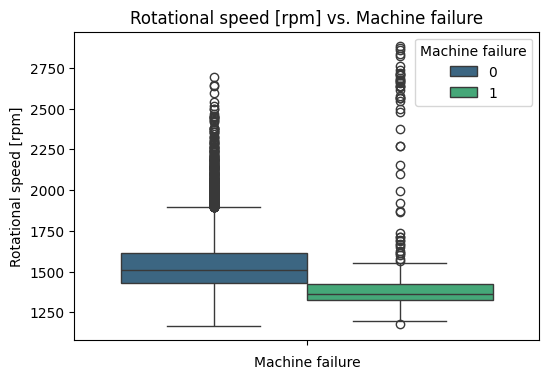

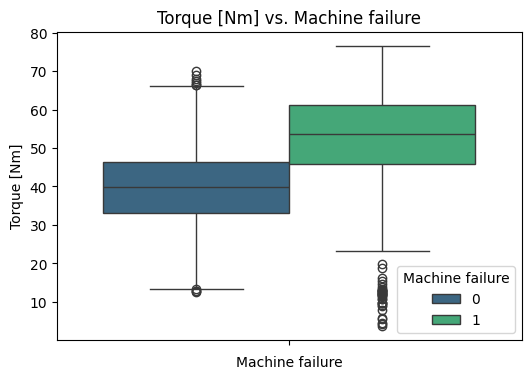

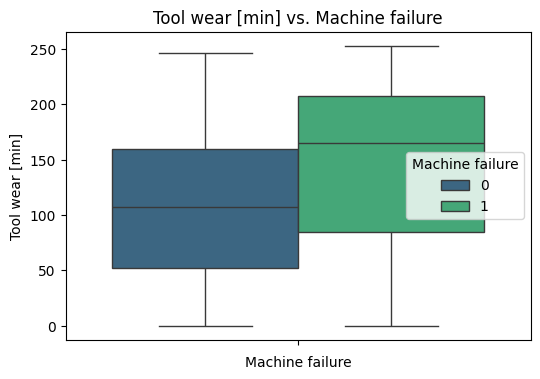

In [ ]:
# Fonction pour tracer des boxplots
def plot_failure_relationship(df, feature, target='Machine failure'):

    plt.figure(figsize=(6, 4))
    sns.boxplot(hue=target, y=feature, data=df, palette='viridis')
    plt.title(f'{feature} vs. {target}')
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()

# Analyser les relations pour les principales caractéristiques
features_to_analyze = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
for feature in features_to_analyze:
    plot_failure_relationship(data_df, feature)


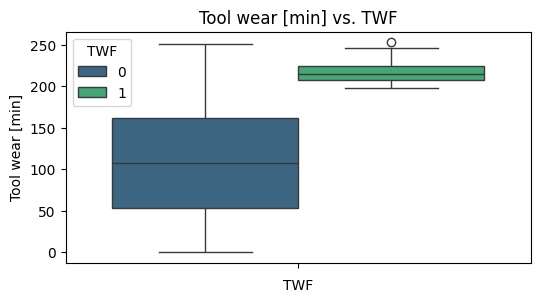

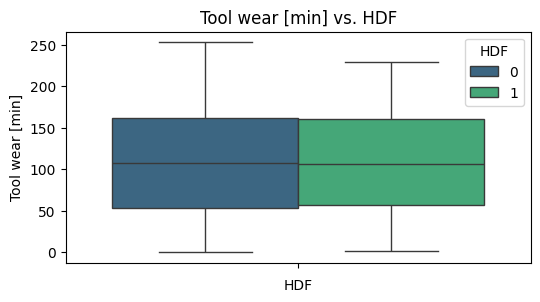

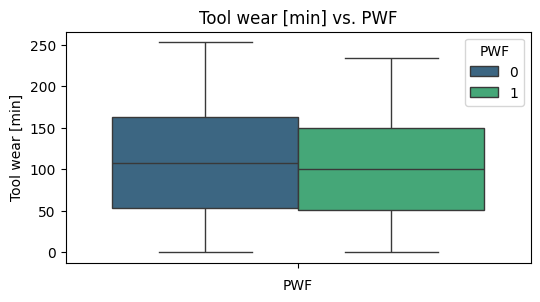

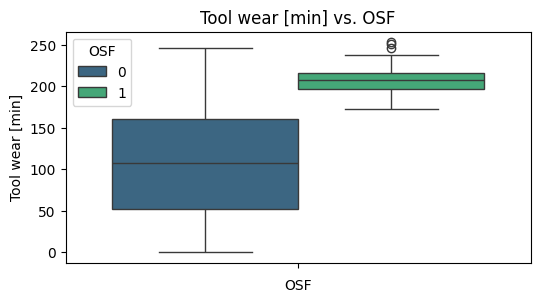

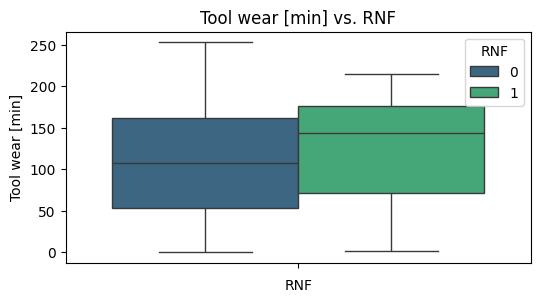

In [ ]:
# Analyse des variables pour chaque type de défaillance
for failure in failure_types:
    plt.figure(figsize=(6, 3))
    sns.boxplot(hue=failure, y='Tool wear [min]', data=data_df, palette='viridis')
    plt.title(f'Tool wear [min] vs. {failure}')
    plt.xlabel(failure)
    plt.ylabel('Tool wear [min]')
    plt.show()


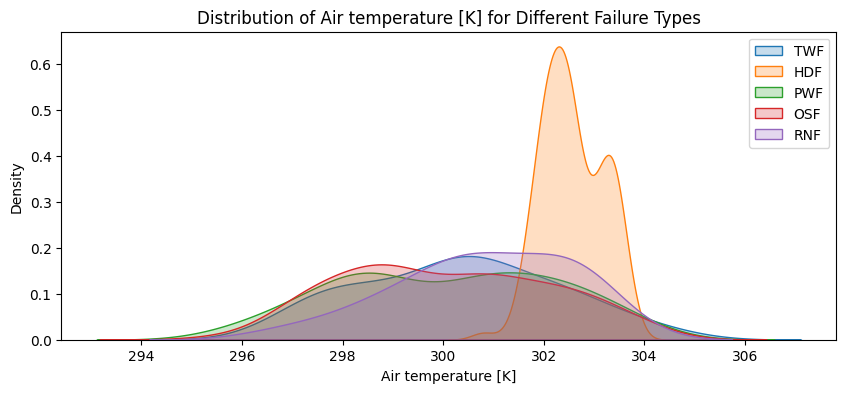

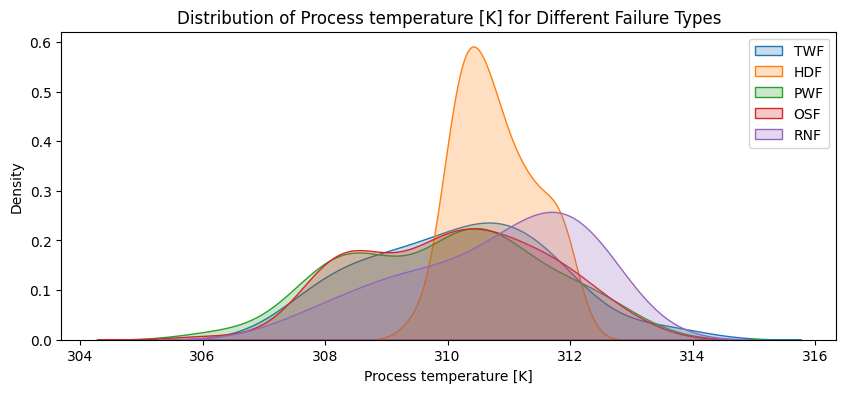

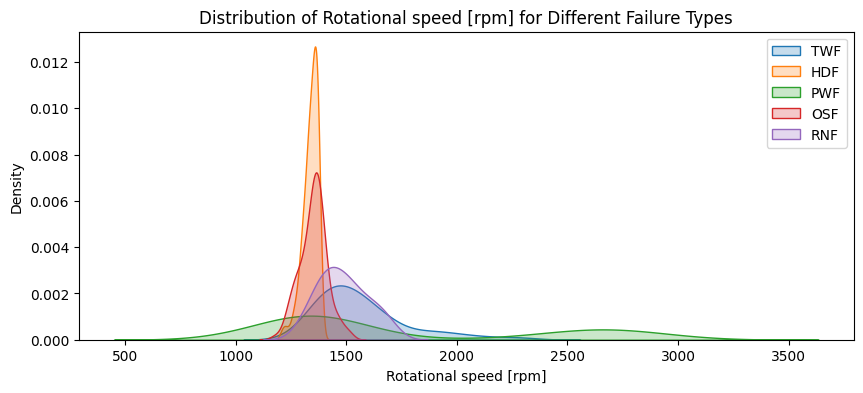

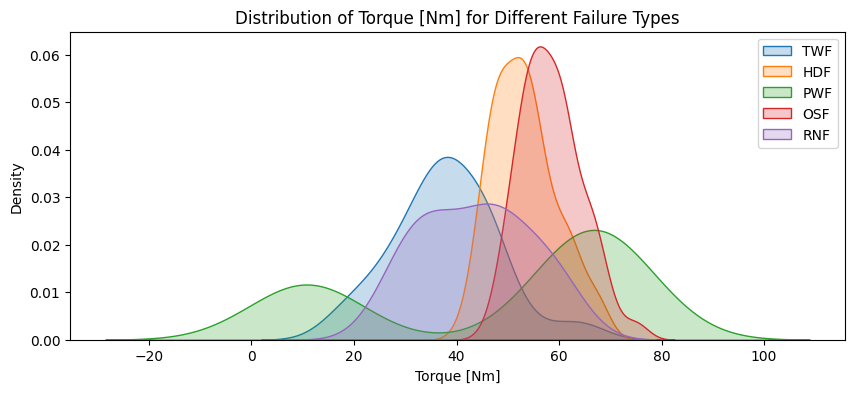

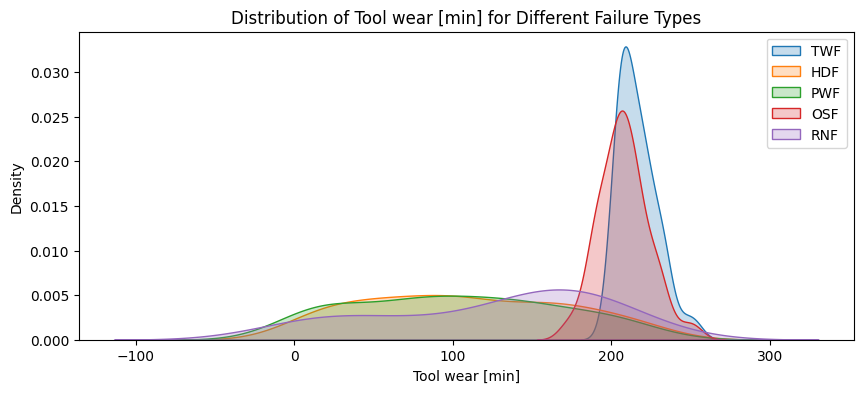

In [ ]:
# Fonction pour tracer des distributions pour chaque type de défaillance
def plot_feature_distributions(df, feature, failure_types):
    plt.figure(figsize=(10, 4))
    for failure in failure_types:
        sns.kdeplot(df[df[failure] == 1][feature], label=failure, fill=True)
    plt.title(f'Distribution of {feature} for Different Failure Types')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Analyser les distributions pour les principales caractéristiques par type de défaillance
for feature in features_to_analyze:
    plot_feature_distributions(data_df, feature, failure_types)


In [ ]:
!pip3 install -U ucimlrepo

<H1>Séparation des données en test et traitement </h1>

In [28]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd

# Séparation des caractéristiques (X) et de la cible (y)

X = data_df.drop(columns=['Machine failure'])
y = data_df['Machine failure']
# Division des données en ensembles d'entraînement et de test
X_train, X_test_Final, y_train, y_test_Final = train_test_split(X, y, test_size=0.2, random_state=42)

# Sélection des colonnes nécessaires de l'entrainement
columns_to_use = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

X_train = X_train[columns_to_use]
X_test = X_test_Final[columns_to_use]

y_test=y_test_Final

# Affichage des formes des ensembles de données
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test_Final.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test_Final.shape}')




X_train shape: (8000, 5)
X_test shape: (2000, 13)
y_train shape: (8000,)
y_test shape: (2000,)



<h1>Normalization</h1>

In [29]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import joblib


# Normalisation des caractéristiques
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Sauvegarder le scaler ajusté
joblib.dump(scaler, 'scaler.save')

# Affichage des formes des ensembles de données pour vérification
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (8000, 5)
y_train shape: (8000,)
X_test shape: (2000, 5)
y_test shape: (2000,)


<h1>Traitement Des Données </h1>

# **RandomForest**

In [ ]:
# Cell 1: Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalisation des caractéristiques
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Entraînement et évaluation du modèle RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)


In [ ]:
print('RandomForestClassifier Report:')
print(classification_report(y_test, y_pred_rf))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))
print('Accuracy:', accuracy_score(y_test, y_pred_rf))

RandomForestClassifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
[[1939    0]
 [   2   59]]
Accuracy: 0.999


**Evalution Model RandomForest**

In [ ]:
# Evaluation avec la validation croisée pour RandomForestClassifier
scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f'RandomForestClassifier Cross-Validation Accuracy: {scores_rf.mean():.4f} ± {scores_rf.std():.4f}')

RandomForestClassifier Cross-Validation Accuracy: 0.8937 ± 0.1646


# **SVC**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Créez le modèle SVM
svm_model = SVC(random_state=42)

# Entraînement du modèle SVM
svm_model.fit(X_train, y_train)

# Prédictions
y_pred_svm = svm_model.predict(X_test)



SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1939
           1       0.90      0.15      0.25        61

    accuracy                           0.97      2000
   macro avg       0.94      0.57      0.62      2000
weighted avg       0.97      0.97      0.96      2000

SVM Confusion Matrix:
[[1938    1]
 [  52    9]]
SVM Accuracy: 0.9735
SVM Cross-Validation Accuracy: 0.9664 ± 0.0002


**Evaluation Model SVC**


In [ ]:
# Évaluation du modèle
print('SVM Classification Report:')
print(classification_report(y_test, y_pred_svm))
print('SVM Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_svm))
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))

# Validation croisée avec SVM
scores_svm = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')
print(f'SVM Cross-Validation Accuracy: {scores_svm.mean():.4f} ± {scores_svm.std():.4f}')


# **Neural Network**

In [30]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Vérifiez et convertissez les types de données
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

# Définir le modèle
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'mae'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

# Évaluer le modèle
loss, accuracy, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test MAE: {mae:.4f}')



Epoch 1/50
200/200 [==============================] - 2s 4ms/step - loss: 0.2319 - accuracy: 0.9620 - mae: 0.1335 - val_loss: 0.1917 - val_accuracy: 0.9588 - val_mae: 0.0686
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.1708 - accuracy: 0.9669 - mae: 0.0771 - val_loss: 0.1833 - val_accuracy: 0.9588 - val_mae: 0.0679
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.1677 - accuracy: 0.9669 - mae: 0.0752 - val_loss: 0.1749 - val_accuracy: 0.9588 - val_mae: 0.0666
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.1623 - accuracy: 0.9669 - mae: 0.0748 - val_loss: 0.1657 - val_accuracy: 0.9588 - val_mae: 0.0716
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.1535 - accuracy: 0.9669 - mae: 0.0720 - val_loss: 0.1633 - val_accuracy: 0.9588 - val_mae: 0.0625
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1486 - accuracy: 0.9669 - mae: 0.0692 - val_loss: 0.15

**Évaluation Model Neural Network**

63/63 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1939
           1       0.88      0.11      0.20        61

    accuracy                           0.97      2000
   macro avg       0.92      0.56      0.59      2000
weighted avg       0.97      0.97      0.96      2000



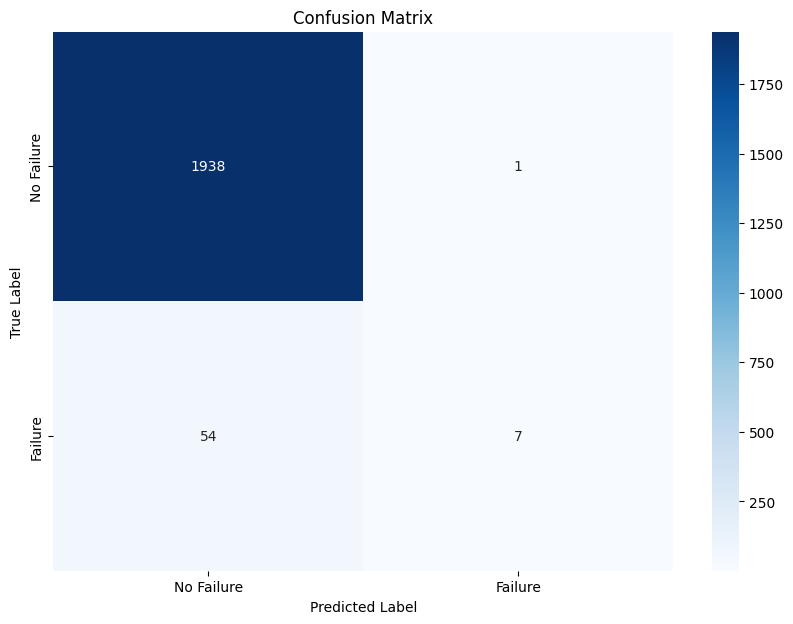

In [31]:
# Prédictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()




Text(0.5, 1.0, 'Loss Curve')

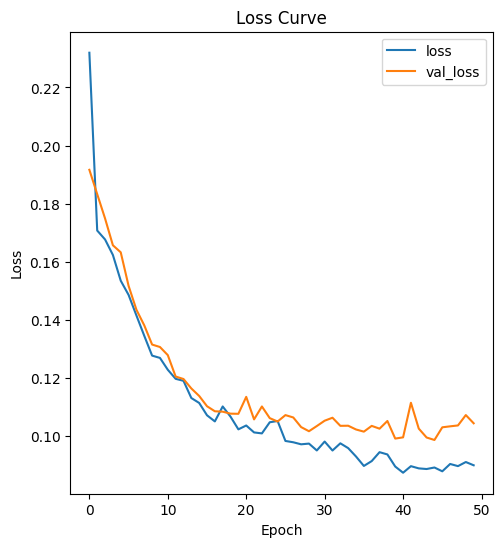

In [32]:
# Visualiser les courbes d'entraînement
plt.figure(figsize=(12, 6))

# Courbe de la perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')


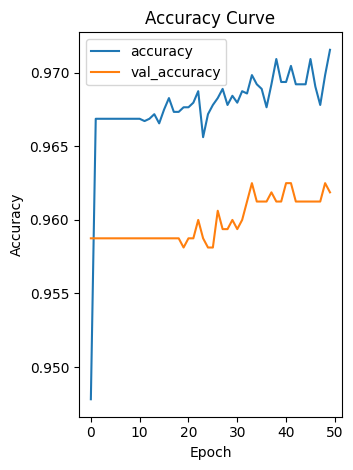

In [ ]:
# Courbe de l'accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.tight_layout()
plt.show()


Après avoir comparé les modèles entraînés, nous avons choisi le modèle de réseau de neurones car il nous a donné les meilleurs résultats : une précision de 97 %

Sauvegarde des données de test et du modèle pour utilisation dans le tableau de bord web

In [33]:
# Sauvegarder le modèle de réseau de neurones
model.save('model.h5')



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
import pandas as pd
import numpy as np

# Sauvegarder les DataFrames en fichiers CSV
X_test_Final.to_csv('X_test_Final.csv', index=False)
